# Classify images using custom activation functions (MNIST dataset)

This guide trains a neural network model to classify images of clothing, like sneakers and shirts using custom activation functions


In [3]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0


## Import the Fashion MNIST dataset


Here, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images.

In [5]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `test_images`, and `test_labels` arrays.

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Each image is mapped to a single label. Since the *class names* are not included with the dataset, store them here to use later when plotting the images:

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Preprocess the data

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

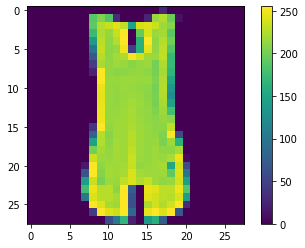

In [0]:
plt.figure()
plt.imshow(train_images[4])
plt.colorbar()
plt.grid(False)
plt.show()

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the *training set* and the *testing set* be preprocessed in the same way:

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the *training set* and display the class name below each image.

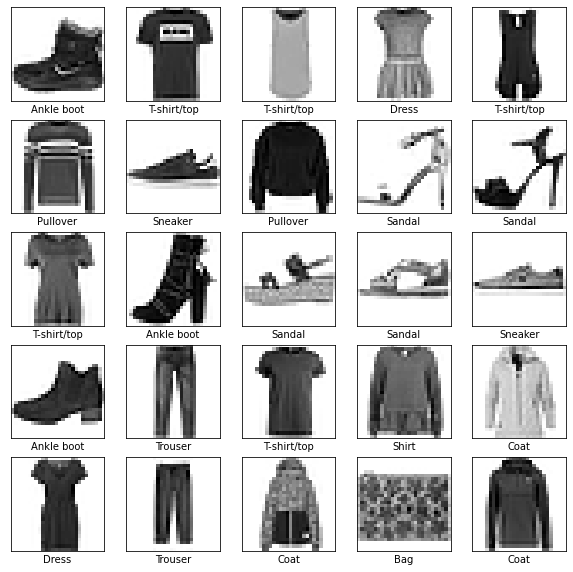

In [0]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Build the model

Building the neural network requires configuring the layers of the model, then compiling the model.

### Custom Activation Functions

In [0]:
# f(x) = sin(x)
def sin_act(x):
  return tf.math.sin(x, name=None)

# f(x) = ln(1 + e^x)
def softPlus(x):
  return tf.math.log(1.0 + tf.math.exp(x, name=None))

# f(x) = arctan(x)
def arcTan(x):
  return tf.math.atan(x)

# f(x) = ((x^2 + 1)^(1/2))/2 - 1
def bentIdentity(x):
  return ((tf.math.sqrt(x**2+1) - 1.0)/2.0 + x)

# f(x) = ln(1 + (e^x/(1 + e^x)))
def custom_1(x):
  return tf.math.log(1.0 + (tf.math.exp(x) / (1.0 + tf.math.exp(x))))


# f(x) = ((x^2 + 1)^(1/2) + x)/2 - 1
def custom_2(x):
  return ((tf.math.sqrt(x**2+1) - 1.0) / 2.0 + 0.5*x)


### Set up the layers

![NN MIST](https://raw.githubusercontent.com/rahuldkjain/classification-using-custom-activation-functions/master/assets/NN-mnist.png)

In [0]:
def setupLayers(activationFunction):
  model = keras.Sequential([
      keras.layers.Flatten(input_shape=(28, 28)),
      keras.layers.Dense(128, activation=activationFunction),
      keras.layers.Dense(10)
  ])
  return model



### Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's *compile* step:

* *Loss function* —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
* *Optimizer* —This is how the model is updated based on the data it sees and its loss function.
* *Metrics* —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

In [0]:
def compileModel(model):
  model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

## Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set—in this example, the `test_images` array.
4. Verify that the predictions match the labels from the `test_labels` array.


### Feed the model

To start training,  call the `model.fit` method—so called because it "fits" the model to the training data:

In [0]:
def trainModel(model):
  history = model.fit(train_images, train_labels, epochs=15, validation_data=(test_images, test_labels))
  return history

### Evaluate accuracy

Next, compare how the model performs on the test dataset:

In [0]:
def evaluateModel(model):
  test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
  print('\nTest accuracy: ' + str(test_acc*100) + '%')

It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents *overfitting*. Overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data. An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data.

### Plot

In [0]:
def plot(history, title, type_1, type_2, yLabel):
  plt.plot(history.history[type_1], label=type_1)
  plt.plot(history.history[type_2], label = type_2)
  plt.title(title)
  plt.xlabel('Epoch')
  plt.ylabel(yLabel)
  plt.ylim([0.5, 1])
  plt.legend(loc='lower right')

### Run Model

In [0]:
def run(activationFunction):
  model = setupLayers(activationFunction)
  compileModel(model)
  print('***************************** '+ str(activationFunction) + 'Activation ***********************')
  history = trainModel(model)
  evaluateModel(model)
  return history

## Using Sigmoid Activation Function

***************************** sigmoidActivation ***********************
Epoch 1/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5398 - accuracy: 0.8158 - val_loss: 0.4452 - val_accuracy: 0.8391
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3926 - accuracy: 0.8583 - val_loss: 0.4238 - val_accuracy: 0.8455
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3549 - accuracy: 0.8715 - val_loss: 0.3810 - val_accuracy: 0.8622
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3299 - accuracy: 0.8803 - val_loss: 0.3696 - val_accuracy: 0.8680
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3110 - accuracy: 0.8861 - val_loss: 0.3589 - val_accuracy: 0.8688
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2969 - accuracy: 0.8914 - val_loss: 0.3572 - val_accuracy: 0.8698
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/s

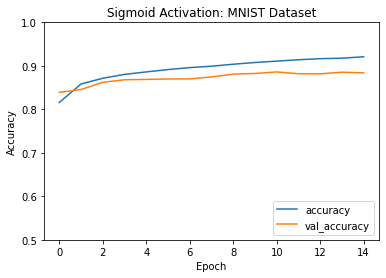

In [0]:
sigmoidHistory = run('sigmoid')
plot(sigmoidHistory, 'Sigmoid Activation: MNIST Dataset', 'accuracy', 'val_accuracy', 'Accuracy')

## Using ReLU Activation Function

***************************** reluActivation ***********************
Epoch 1/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4974 - accuracy: 0.8256 - val_loss: 0.4175 - val_accuracy: 0.8510
Epoch 2/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3768 - accuracy: 0.8647 - val_loss: 0.3972 - val_accuracy: 0.8587
Epoch 3/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3359 - accuracy: 0.8769 - val_loss: 0.3759 - val_accuracy: 0.8635
Epoch 4/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3124 - accuracy: 0.8855 - val_loss: 0.3572 - val_accuracy: 0.8715
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2957 - accuracy: 0.8913 - val_loss: 0.3512 - val_accuracy: 0.8723
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2794 - accuracy: 0.8974 - val_loss: 0.3423 - val_accuracy: 0.8774
Epoch 7/15
1875/1875 [==============================] - 5s 2ms/step

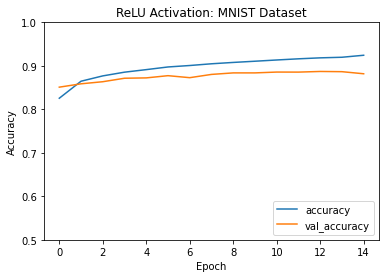

In [0]:
reluHistory = run('relu')
plot(reluHistory, 'ReLU Activation: MNIST Dataset', 'accuracy', 'val_accuracy', 'Accuracy')

## Using tanh Activation Function

***************************** tanhActivation ***********************
Epoch 1/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4774 - accuracy: 0.8287 - val_loss: 0.4289 - val_accuracy: 0.8485
Epoch 2/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3701 - accuracy: 0.8647 - val_loss: 0.4298 - val_accuracy: 0.8415
Epoch 3/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3351 - accuracy: 0.8771 - val_loss: 0.3607 - val_accuracy: 0.8685
Epoch 4/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3135 - accuracy: 0.8852 - val_loss: 0.3511 - val_accuracy: 0.8693
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2957 - accuracy: 0.8902 - val_loss: 0.3456 - val_accuracy: 0.8753
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2791 - accuracy: 0.8966 - val_loss: 0.3421 - val_accuracy: 0.8750
Epoch 7/15
1875/1875 [==============================] - 5s 2ms/step

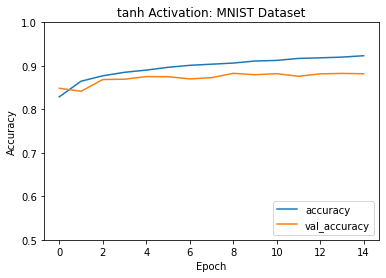

In [0]:
tanhHistory = run('tanh')
plot(tanhHistory, 'tanh Activation: MNIST Dataset', 'accuracy', 'val_accuracy', 'Accuracy')

## Using arcTan Activation Function

***************************** <function arcTan at 0x7f5a760dd268>Activation ***********************
Epoch 1/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4803 - accuracy: 0.8278 - val_loss: 0.4442 - val_accuracy: 0.8364
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3768 - accuracy: 0.8640 - val_loss: 0.3823 - val_accuracy: 0.8630
Epoch 3/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3420 - accuracy: 0.8746 - val_loss: 0.3943 - val_accuracy: 0.8594
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3213 - accuracy: 0.8816 - val_loss: 0.3845 - val_accuracy: 0.8577
Epoch 5/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3037 - accuracy: 0.8869 - val_loss: 0.3589 - val_accuracy: 0.8729
Epoch 6/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2892 - accuracy: 0.8929 - val_loss: 0.3444 - val_accuracy: 0.8764
Epoch 7/15
1875/1875 [==============

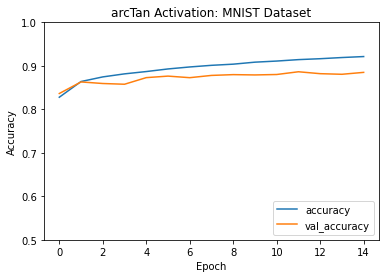

In [0]:
arcTanHistory = run(arcTan)
plot(arcTanHistory, 'arcTan Activation: MNIST Dataset', 'accuracy', 'val_accuracy', 'Accuracy')

## Using Custom-1 Activation Function

***************************** <function custom_1 at 0x7f5a760dd730>Activation ***********************
Epoch 1/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5697 - accuracy: 0.8114 - val_loss: 0.4456 - val_accuracy: 0.8394
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3980 - accuracy: 0.8574 - val_loss: 0.4174 - val_accuracy: 0.8502
Epoch 3/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3601 - accuracy: 0.8691 - val_loss: 0.3919 - val_accuracy: 0.8611
Epoch 4/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3353 - accuracy: 0.8774 - val_loss: 0.3705 - val_accuracy: 0.8644
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3174 - accuracy: 0.8855 - val_loss: 0.3583 - val_accuracy: 0.8672
Epoch 6/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3037 - accuracy: 0.8893 - val_loss: 0.3637 - val_accuracy: 0.8669
Epoch 7/15
1875/1875 [============

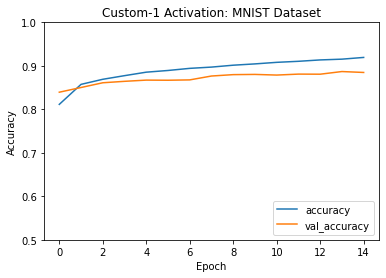

In [0]:
custom_1_History = run(custom_1)
plot(custom_1_History, 'Custom-1 Activation: MNIST Dataset', 'accuracy', 'val_accuracy', 'Accuracy')

## Using Custom-2 Activation Function

***************************** <function custom_2 at 0x7f5a6f959d08>Activation ***********************
Epoch 1/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4999 - accuracy: 0.8241 - val_loss: 0.4596 - val_accuracy: 0.8332
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3736 - accuracy: 0.8651 - val_loss: 0.3774 - val_accuracy: 0.8640
Epoch 3/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3315 - accuracy: 0.8790 - val_loss: 0.3870 - val_accuracy: 0.8567
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3080 - accuracy: 0.8868 - val_loss: 0.3489 - val_accuracy: 0.8742
Epoch 5/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2883 - accuracy: 0.8925 - val_loss: 0.3574 - val_accuracy: 0.8706
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2727 - accuracy: 0.8985 - val_loss: 0.3422 - val_accuracy: 0.8759
Epoch 7/15
1875/1875 [============

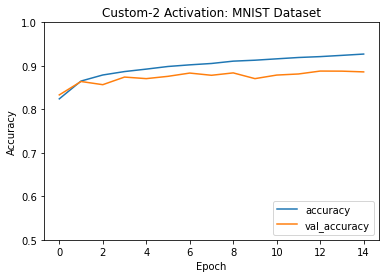

In [0]:
custom_2_History = run(custom_2)
plot(custom_2_History, 'Custom-2 Activation: MNIST Dataset', 'accuracy', 'val_accuracy', 'Accuracy')

## Validation Accuracy Comparison

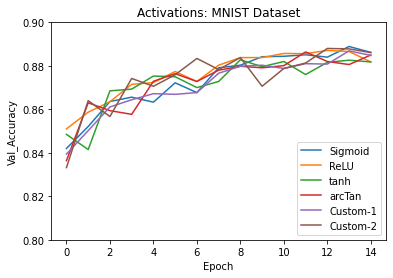

In [0]:
plt.plot(sigmoidHistory.history['val_accuracy'], label = 'Sigmoid')
plt.plot(reluHistory.history['val_accuracy'], label='ReLU')
plt.plot(tanhHistory.history['val_accuracy'], label='tanh')
plt.plot(arcTanHistory.history['val_accuracy'], label='arcTan')
plt.plot(custom_1_History.history['val_accuracy'], label='Custom-1')
plt.plot(custom_2_History.history['val_accuracy'], label='Custom-2')
plt.title('Activations: MNIST Dataset')
plt.xlabel('Epoch')
plt.ylabel('Val_Accuracy')
plt.ylim([0.8, 0.9])
plt.legend(loc='lower right')


## Accuracy Comparison

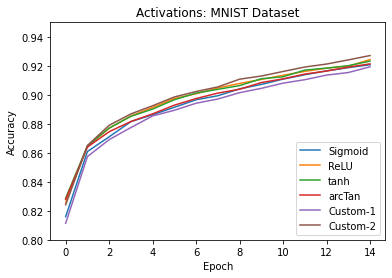

In [0]:
plt.plot(sigmoidHistory.history['accuracy'], label = 'Sigmoid')
plt.plot(reluHistory.history['accuracy'], label='ReLU')
plt.plot(tanhHistory.history['accuracy'], label='tanh')
plt.plot(arcTanHistory.history['accuracy'], label='arcTan')
plt.plot(custom_1_History.history['accuracy'], label='Custom-1')
plt.plot(custom_2_History.history['accuracy'], label='Custom-2')
plt.title('Activations: MNIST Dataset')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8, 0.95])
plt.legend(loc='lower right')

## Validation Loss Comparison

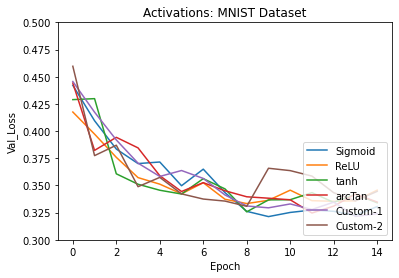

In [0]:
plt.plot(sigmoidHistory.history['val_loss'], label = 'Sigmoid')
plt.plot(reluHistory.history['val_loss'], label='ReLU')
plt.plot(tanhHistory.history['val_loss'], label='tanh')
plt.plot(arcTanHistory.history['val_loss'], label='arcTan')
plt.plot(custom_1_History.history['val_loss'], label='Custom-1')
plt.plot(custom_2_History.history['val_loss'], label='Custom-2')
plt.title('Activations: MNIST Dataset')
plt.xlabel('Epoch')
plt.ylabel('Val_Loss')
plt.ylim([0.3, 0.5])
plt.legend(loc='lower right')

## Loss Comparison


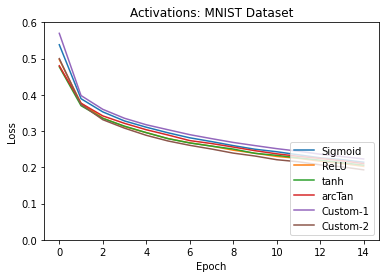

In [0]:
plt.plot(sigmoidHistory.history['loss'], label = 'Sigmoid')
plt.plot(reluHistory.history['loss'], label='ReLU')
plt.plot(tanhHistory.history['loss'], label='tanh')
plt.plot(arcTanHistory.history['loss'], label='arcTan')
plt.plot(custom_1_History.history['loss'], label='Custom-1')
plt.plot(custom_2_History.history['loss'], label='Custom-2')
plt.title('Activations: MNIST Dataset')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 0.6])
plt.legend(loc='lower right')